<a href="https://colab.research.google.com/github/Kaua-Rbs/Deep-Learning-From-A-To-Z-With-Pytorch-And-Python/blob/main/Project_8_Regression_Used_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 8: Regression - Used Cars

## Importing Libraries

In [ ]:
import pandas as pd
import torch
import numpy as np
import seaborn as sns
from torch import nn, optim
import torch.nn.functional as F
torch.__version__

'2.3.0+cu121'

## Database

In [ ]:
np.random.seed(123)
torch.manual_seed(123)

In [ ]:
base = pd.read_csv('autos.csv', encoding = 'ISO-8859-1')

In [ ]:
base.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [ ]:
base.shape

(371528, 15)

In [ ]:
base = base.drop('dateCrawled', axis = 1)
base = base.drop('dateCreated', axis = 1)
base = base.drop('nrOfPictures', axis = 1)
base = base.drop('postalCode', axis = 1)
base = base.drop('lastSeen', axis = 1)

In [ ]:
base.shape

(371528, 15)

In [ ]:
base['name'].value_counts()

name
Ford_Fiesta                                              657
BMW_318i                                                 627
Opel_Corsa                                               622
Volkswagen_Golf_1.4                                      603
BMW_316i                                                 523
                                                        ... 
Audi_A4_Avant_Klima_Gruene_Plakette_TÜV_&AU_NEU_XENON      1
Renault_clio_in_gold_450VB_!!                              1
Fiat_Doblo_1.6_Multijet                                    1
Renault_Laguna_1                                           1
BMW_M135i_vollausgestattet_NP_52.720____Euro               1
Name: count, Length: 233531, dtype: int64

In [ ]:
base = base.drop('name', axis = 1)

In [ ]:
base['seller'].value_counts()

seller
privat        371525
gewerblich         3
Name: count, dtype: int64

In [ ]:
base = base.drop('seller', axis = 1)

In [ ]:
base['offerType'].value_counts()

offerType
Angebot    371516
Gesuch         12
Name: count, dtype: int64

In [ ]:
base = base.drop('offerType', axis = 1)

In [ ]:
base.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [ ]:
i1 = base.loc[base.price <= 10]

In [ ]:
i1.shape

(12118, 12)

In [ ]:
base = base[base.price > 10]

In [ ]:
base.shape

(359410, 12)

In [ ]:
i2 = base.loc[base.price > 350000]

In [ ]:
i2.shape

(115, 12)

In [ ]:
base = base.loc[base.price < 350000]

In [ ]:
base.shape

(359291, 12)

<Axes: >

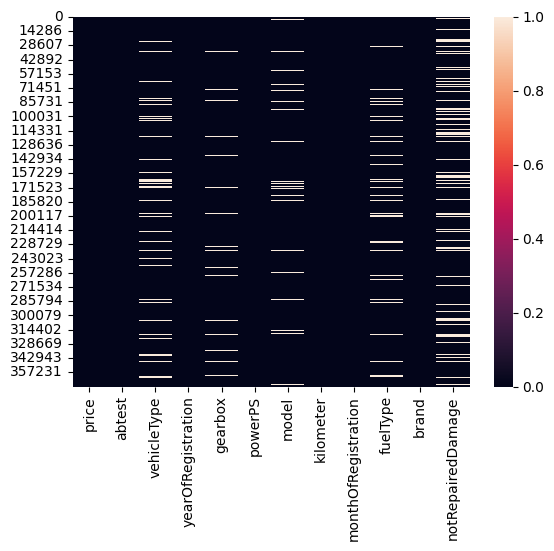

In [ ]:
sns.heatmap(base.isnull())

In [ ]:
base.loc[pd.isnull(base['vehicleType'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
16,300,test,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN
22,2900,test,NaN,2018,manuell,90,meriva,150000,5,benzin,opel,nein
26,5555,control,NaN,2017,manuell,125,c4,125000,4,NaN,citroen,nein
31,899,control,NaN,2016,manuell,60,clio,150000,6,benzin,renault,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371495,180,control,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN
371504,2600,control,NaN,2005,automatik,0,c_klasse,150000,9,NaN,mercedes_benz,NaN
371509,1900,test,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein
371519,5250,control,NaN,2016,automatik,150,159,150000,12,NaN,alfa_romeo,nein


In [ ]:
base['vehicleType'].value_counts() # limousine

vehicleType
limousine     93614
kleinwagen    78014
kombi         65921
bus           29699
cabrio        22509
coupe         18386
suv           14477
andere         3125
Name: count, dtype: int64

In [ ]:
base.loc[pd.isnull(base['gearbox'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
15,450,test,kleinwagen,1910,NaN,0,ka,5000,0,benzin,ford,NaN
16,300,test,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN
32,245,test,limousine,1994,NaN,0,golf,150000,2,benzin,volkswagen,nein
37,1500,test,NaN,2016,NaN,0,kangoo,150000,1,diesel,renault,nein
70,1200,test,coupe,2001,NaN,0,astra,150000,0,NaN,opel,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371443,3300,control,kombi,2006,NaN,0,touran,150000,7,diesel,volkswagen,NaN
371460,3500,control,NaN,1995,NaN,0,polo,150000,0,NaN,volkswagen,NaN
371486,350,control,kleinwagen,1996,NaN,65,punto,150000,0,NaN,fiat,NaN
371495,180,control,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN


In [ ]:
base['gearbox'].value_counts() # manuell

gearbox
manuell      266547
automatik     75508
Name: count, dtype: int64

In [ ]:
base.loc[pd.isnull(base['model'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
83,350,control,kleinwagen,1997,manuell,54,NaN,150000,3,NaN,fiat,ja
139,1450,control,limousine,1992,manuell,136,NaN,150000,0,NaN,audi,nein
156,6799,control,kleinwagen,2009,NaN,60,NaN,20000,5,benzin,volkswagen,nein
165,500,control,kleinwagen,1999,manuell,0,NaN,150000,0,benzin,renault,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371399,560,control,kleinwagen,2001,automatik,170,NaN,90000,0,benzin,fiat,ja
371476,9400,control,kombi,2007,manuell,200,NaN,150000,4,diesel,sonstige_autos,ja
371495,180,control,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN
371509,1900,test,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein


In [ ]:
base['model'].value_counts() # golf

model
golf               28989
andere             25560
3er                19905
polo               12604
corsa              12149
                   ...  
serie_2                8
rangerover             6
serie_3                3
serie_1                1
discovery_sport        1
Name: count, Length: 251, dtype: int64

In [ ]:
base.loc[pd.isnull(base['fuelType'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
9,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN
13,2500,control,kombi,2004,manuell,131,passat,150000,2,NaN,volkswagen,nein
26,5555,control,NaN,2017,manuell,125,c4,125000,4,NaN,citroen,nein
36,1600,control,andere,1991,manuell,75,kadett,70000,0,NaN,opel,NaN
41,7500,control,limousine,2002,automatik,306,e_klasse,150000,4,NaN,mercedes_benz,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371496,3850,test,cabrio,2006,manuell,108,2_reihe,125000,2,NaN,peugeot,nein
371504,2600,control,NaN,2005,automatik,0,c_klasse,150000,9,NaN,mercedes_benz,NaN
371509,1900,test,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein
371519,5250,control,NaN,2016,automatik,150,159,150000,12,NaN,alfa_romeo,nein


In [ ]:
base['fuelType'].value_counts() # benzin

fuelType
benzin     217582
diesel     106002
lpg          5222
cng           557
hybrid        271
andere        165
elektro       101
Name: count, dtype: int64

In [ ]:
base.loc[pd.isnull(base['notRepairedDamage'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
8,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN
9,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN
12,999,control,kombi,1995,manuell,115,passat,150000,11,benzin,volkswagen,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371507,5999,test,kombi,2005,manuell,140,a4,150000,4,diesel,audi,NaN
371514,999,control,cabrio,2000,manuell,95,megane,150000,4,benzin,renault,NaN
371515,1690,test,kombi,2004,manuell,55,fabia,150000,4,benzin,skoda,NaN
371523,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN


In [ ]:
base['notRepairedDamage'].value_counts() # nein

notRepairedDamage
nein    259301
ja       34004
Name: count, dtype: int64

In [ ]:
base.loc[pd.isnull(base['price'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage


In [ ]:
valores = {'vehicleType': 'limousine', 'gearbox': 'manuell',
           'model': 'golf', 'fuelType': 'benzin',
           'notRepairedDamage': 'nein'}
base = base.fillna(value = valores)

In [ ]:
base.loc[pd.isnull(base['notRepairedDamage'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage


In [ ]:
previsores = base.iloc[:, 1:13].values
preco_real = base.iloc[:, 0].values

In [ ]:
previsores.shape

(359291, 11)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# 1 0 0
# 0 1 0
# 0 0 1

In [ ]:
onehotencoder = ColumnTransformer(transformers = [("OneHot", OneHotEncoder(),
                                                   [0,1,3,5,8,9,10])],
                                  remainder = 'passthrough')
previsores = onehotencoder.fit_transform(previsores).toarray()

In [ ]:
previsores.shape

(359291, 316)

In [ ]:
previsores[0]

array([0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

In [ ]:
previsores = torch.tensor(previsores, dtype = torch.float)
preco_real = torch.tensor(preco_real, dtype = torch.float).view(-1, 1)

In [ ]:
type(previsores)

torch.Tensor

In [ ]:
preco_real.shape

torch.Size([359291, 1])

## Model Structuring

In [ ]:
# 316 -> 158 -> 158 -> 1
# (entradas + saídas) / 2 = (316 + 1) / 2
regressor = nn.Sequential(nn.Linear(316, 158),
                          nn.ReLU(),
                          nn.Linear(158, 158),
                          nn.ReLU(),
                          nn.Linear(158, 1))

In [ ]:
criterion = nn.L1Loss()

In [ ]:
optimizer = optim.Adam(regressor.parameters())

In [ ]:
dataset = torch.utils.data.TensorDataset(previsores, preco_real)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=300, shuffle=True)

## Model Training

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
regressor.to(device)

Sequential(
  (0): Linear(in_features=316, out_features=158, bias=True)
  (1): ReLU()
  (2): Linear(in_features=158, out_features=158, bias=True)
  (3): ReLU()
  (4): Linear(in_features=158, out_features=1, bias=True)
)

In [ ]:
for epoch in range(100):
  running_loss = 0.
  running_mae = 0.

  for i, data in enumerate(train_loader):
    inputs, labels = data

    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()

    outputs = regressor.forward(inputs)

    mae = F.l1_loss(outputs, labels).item()

    running_mae += mae

    loss = criterion(outputs, labels)
    loss.backward()

    optimizer.step()

    running_loss += loss.item()

    print('\rÉpoca {:3d} - Loop {:3d} de {:3d}: perda {:06.2f} - MAE {:06.2f}'.format(epoch+1,
                                                                                      i + 1,
                                                                                      len(preco_real)//300,
                                                                                      loss, mae))
  print('ÉPOCA {:3d} finalizada: perda {:0.5f} - MAE {:0.5f} '.format(epoch+1,
                                                                      running_loss/len(train_loader),
                                                                      running_mae/len(train_loader)))

A saída de streaming foi truncada nas últimas 5000 linhas.
Época  96 - Loop 996 de 1197: perda 2123.04 - MAE 2123.04
Época  96 - Loop 997 de 1197: perda 2067.87 - MAE 2067.87
Época  96 - Loop 998 de 1197: perda 1846.16 - MAE 1846.16
Época  96 - Loop 999 de 1197: perda 2104.92 - MAE 2104.92
Época  96 - Loop 1000 de 1197: perda 2014.87 - MAE 2014.87
Época  96 - Loop 1001 de 1197: perda 1967.91 - MAE 1967.91
Época  96 - Loop 1002 de 1197: perda 2083.63 - MAE 2083.63
Época  96 - Loop 1003 de 1197: perda 2222.57 - MAE 2222.57
Época  96 - Loop 1004 de 1197: perda 2000.47 - MAE 2000.47
Época  96 - Loop 1005 de 1197: perda 2134.91 - MAE 2134.91
Época  96 - Loop 1006 de 1197: perda 2239.16 - MAE 2239.16
Época  96 - Loop 1007 de 1197: perda 2253.15 - MAE 2253.15
Época  96 - Loop 1008 de 1197: perda 2237.76 - MAE 2237.76
Época  96 - Loop 1009 de 1197: perda 2092.28 - MAE 2092.28
Época  96 - Loop 1010 de 1197: perda 2310.60 - MAE 2310.60
Época  96 - Loop 1011 de 1197: perda 2066.55 - MAE 2066.55
É

## Model Evaluation

In [ ]:
regressor.eval()

Sequential(
  (0): Linear(in_features=316, out_features=158, bias=True)
  (1): ReLU()
  (2): Linear(in_features=158, out_features=158, bias=True)
  (3): ReLU()
  (4): Linear(in_features=158, out_features=1, bias=True)
)

In [ ]:
previsoes = regressor.forward(previsores.to(device))

In [ ]:
previsoes

tensor([[ 1055.9597],
        [11548.1123],
        [13998.4863],
        ...,
        [ 6131.9541],
        [ 3761.1594],
        [26551.2578]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
preco_real

tensor([[  480.],
        [18300.],
        [ 9800.],
        ...,
        [ 9200.],
        [ 3400.],
        [28990.]])

In [ ]:
preco_real.mean()

tensor(5916.8335)

In [ ]:
previsoes.mean()

tensor(5773.6724, device='cuda:0', grad_fn=<MeanBackward0>)